# Preprocessing

#### Wczytanie i wstępna wizualizacja danych

In [2]:
data = read.csv("day.csv")
head(data)

instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


In [3]:
summary(data)

    instant             dteday        season            yr        
 Min.   :  1.0   2011-01-01:  1   Min.   :1.000   Min.   :0.0000  
 1st Qu.:183.5   2011-01-02:  1   1st Qu.:2.000   1st Qu.:0.0000  
 Median :366.0   2011-01-03:  1   Median :3.000   Median :1.0000  
 Mean   :366.0   2011-01-04:  1   Mean   :2.497   Mean   :0.5007  
 3rd Qu.:548.5   2011-01-05:  1   3rd Qu.:3.000   3rd Qu.:1.0000  
 Max.   :731.0   2011-01-06:  1   Max.   :4.000   Max.   :1.0000  
                 (Other)   :725                                   
      mnth          holiday           weekday        workingday   
 Min.   : 1.00   Min.   :0.00000   Min.   :0.000   Min.   :0.000  
 1st Qu.: 4.00   1st Qu.:0.00000   1st Qu.:1.000   1st Qu.:0.000  
 Median : 7.00   Median :0.00000   Median :3.000   Median :1.000  
 Mean   : 6.52   Mean   :0.02873   Mean   :2.997   Mean   :0.684  
 3rd Qu.:10.00   3rd Qu.:0.00000   3rd Qu.:5.000   3rd Qu.:1.000  
 Max.   :12.00   Max.   :1.00000   Max.   :6.000   Max.   :1.0

In [27]:
keeps <- c("atemp", "temp", "hum", "windspeed", "cnt")
df = data[keeps]
head(df)

atemp,temp,hum,windspeed,cnt
0.363625,0.344167,0.805833,0.1604460,985
0.353739,0.363478,0.696087,0.2485390,801
0.189405,0.196364,0.437273,0.2483090,1349
0.212122,0.200000,0.590435,0.1602960,1562
0.229270,0.226957,0.436957,0.1869000,1600
0.233209,0.204348,0.518261,0.0895652,1606


### Wstępny model


Call:
lm(formula = df$cnt ~ df$hum + df$windspeed + df$temp + df$atemp)

Residuals:
   Min     1Q Median     3Q    Max 
 -4855  -1046    -79   1055   3564 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    3860.4      355.4  10.862  < 2e-16 ***
df$hum        -3149.1      384.0  -8.201 1.08e-15 ***
df$windspeed  -4528.7      721.1  -6.280 5.82e-10 ***
df$temp        2111.8     2282.2   0.925   0.3551    
df$atemp       5139.2     2577.0   1.994   0.0465 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1422 on 726 degrees of freedom
Multiple R-squared:  0.4638,	Adjusted R-squared:  0.4609 
F-statistic:   157 on 4 and 726 DF,  p-value: < 2.2e-16


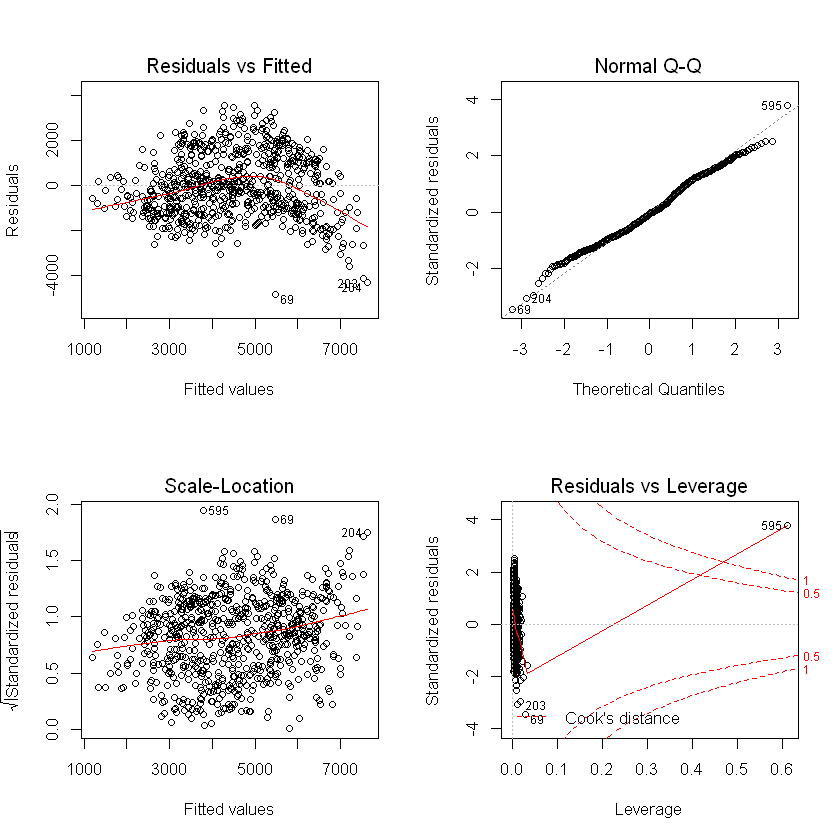

In [28]:
model <- lm(df$cnt~df$hum + df$windspeed +  df$temp + df$atemp)
summary(model)
par(mfrow=c(2, 2))
plot(model)

### Metoda forward

In [29]:
model.forward <- step(model, direction="forward", trace=1, scope= ~df$temp + df$atemp + df$hum + df$windspeed)

Start:  AIC=10619.25
df$cnt ~ df$hum + df$windspeed + df$temp + df$atemp



### Metoda backward

In [30]:
model.backward <- step(model, direction="backward", trace=1, scope= ~df$temp + df$atemp + df$hum + df$windspeed)

Start:  AIC=10619.25
df$cnt ~ df$hum + df$windspeed + df$temp + df$atemp

               Df Sum of Sq        RSS   AIC
- df$temp       1   1732390 1470583292 10618
<none>                      1468850901 10619
- df$atemp      1   8046300 1476897201 10621
- df$windspeed  1  79801308 1548652210 10656
- df$hum        1 136071493 1604922394 10682

Step:  AIC=10618.11
df$cnt ~ df$hum + df$windspeed + df$atemp

               Df  Sum of Sq        RSS   AIC
<none>                       1470583292 10618
- df$windspeed  1   78133572 1548716864 10654
- df$hum        1  138033214 1608616506 10682
- df$atemp      1 1044485733 2515069025 11008


Odrzucamy zmienną temp

## DFFITS

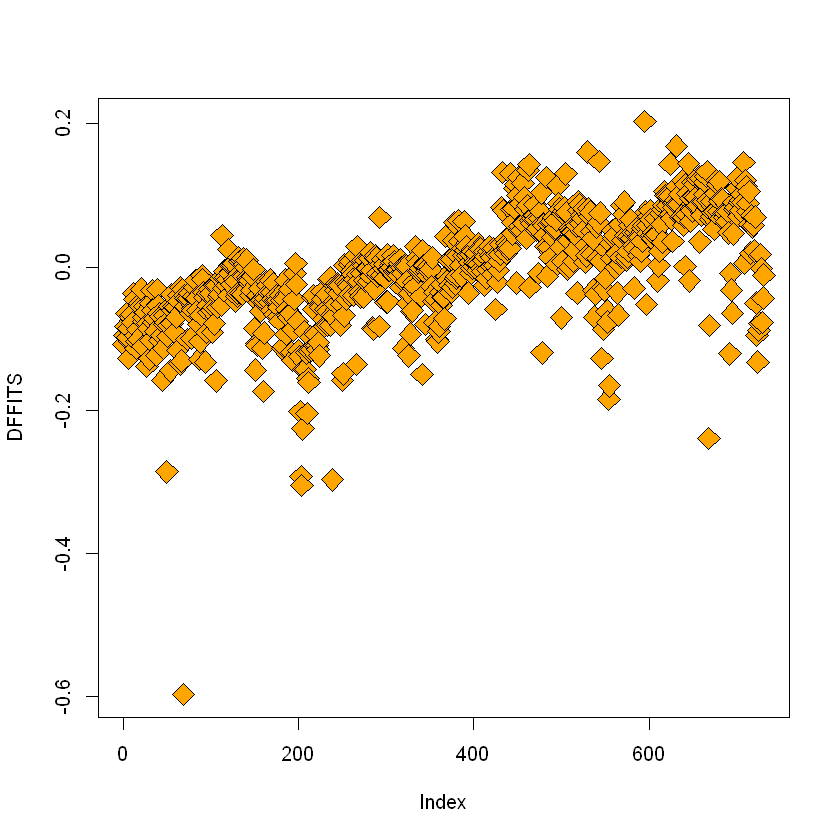

In [32]:
model <- lm(df$cnt~df$hum + df$windspeed + df$atemp)
plot(dffits(model), pch=23, bg='orange', cex=2, ylab="DFFITS")

wybranie rekordów z wiekszym od progu

In [33]:
x_dffits <- df
x_dffits <- x_dffits[which(abs(dffits(model)) < 0.2),]
head(x_dffits)

atemp,temp,hum,windspeed,cnt
0.363625,0.344167,0.805833,0.1604460,985
0.353739,0.363478,0.696087,0.2485390,801
0.189405,0.196364,0.437273,0.2483090,1349
0.212122,0.200000,0.590435,0.1602960,1562
0.229270,0.226957,0.436957,0.1869000,1600
0.233209,0.204348,0.518261,0.0895652,1606


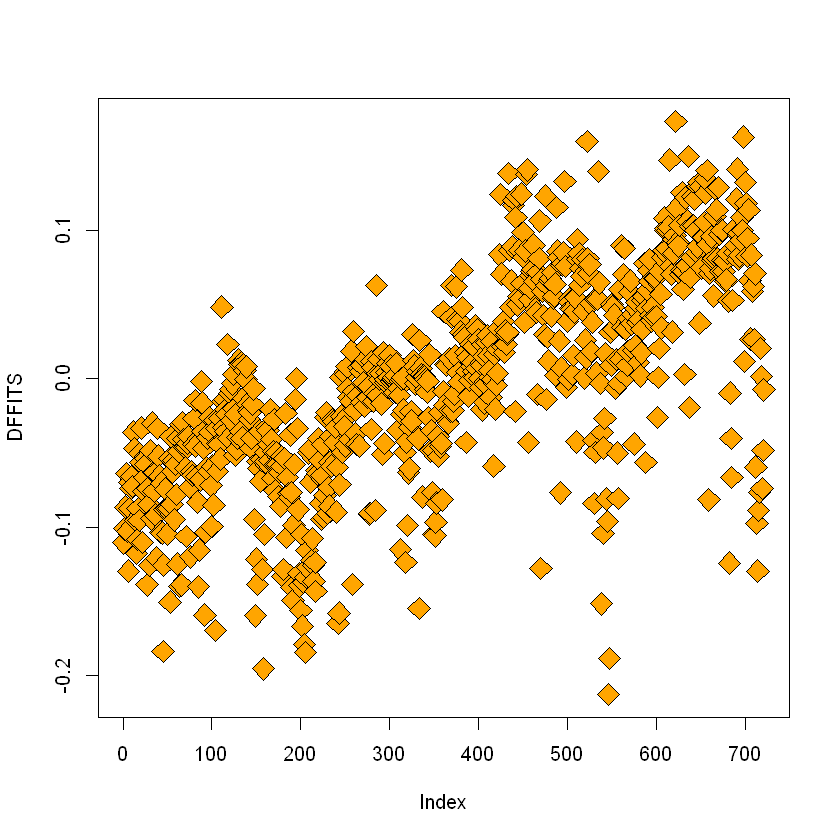

In [34]:
model <- lm(x_dffits$cnt~x_dffits$hum + x_dffits$windspeed + x_dffits$atemp)
plot(dffits(model), pch=23, bg='orange', cex=2, ylab="DFFITS")

In [35]:
removed_rate <- 100 * (1 - (nrow(x_dffits) / nrow(df)))

print(removed_rate)

[1] 1.367989


## Normalizacja

#### Normalizacja

In [36]:
x <- x_dffits
normalized = (x-min(x))/(max(x)-min(x))
normalized$cnt = x_dffits$cnt
head(normalized)

atemp,temp,hum,windspeed,cnt
3.915930e-05,3.692634e-05,8.990628e-05,1.584286e-05,985
3.802481e-05,3.914243e-05,7.731203e-05,2.595225e-05,801
1.916614e-05,1.996474e-05,4.761101e-05,2.592585e-05,1349
2.177310e-05,2.038200e-05,6.518760e-05,1.582564e-05,1562
2.374097e-05,2.347554e-05,4.757475e-05,1.887867e-05,1600
2.419300e-05,2.088097e-05,5.690505e-05,7.708707e-06,1606


In [37]:
write.csv(normalized, file = "day_normalized.csv")

### Standaryzacja

In [38]:
library(psycho)
library(tidyverse)

stnd <- x %>% 
  psycho::standardize() 

stnd$cnt = x$cnt
summary(stnd)

ERROR: Error in library(psycho): there is no package called 'psycho'


In [39]:
head(stnd)

ERROR: Error in head(stnd): nie znaleziono obiektu 'stnd'


In [40]:
write.csv(stnd, file = "day_stnd.csv")

ERROR: Error in is.data.frame(x): nie znaleziono obiektu 'stnd'


## Macierz korelacji

In [41]:
cor(normalized)

,atemp,temp,hum,windspeed,cnt
atemp,1.0000000,0.9966971,0.1435695,-0.1842437,0.6591440
temp,0.9966971,1.0000000,0.1308504,-0.1590026,0.6473375
hum,0.1435695,0.1308504,1.0000000,-0.2487767,-0.1147473
windspeed,-0.1842437,-0.1590026,-0.2487767,1.0000000,-0.2204788
cnt,0.6591440,0.6473375,-0.1147473,-0.2204788,1.0000000


## Histogramy dla wartości znormalizowanych

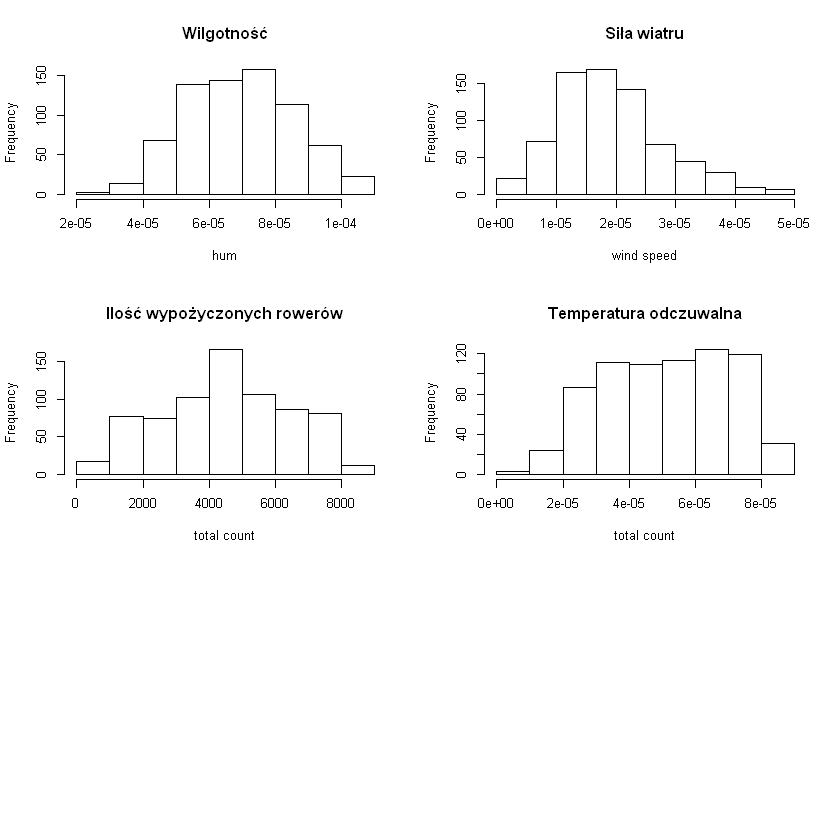

In [42]:
par(mfrow = c(3,2))

hist(normalized$hum, xlab = 'hum', main = 'Wilgotność')
hist(normalized$windspeed, xlab = 'wind speed', main = 'Siła wiatru')
hist(normalized$cnt, xlab = 'total count', main = 'Ilość wypożyczonych rowerów')
hist(normalized$atemp, xlab = 'total count', main = 'Temperatura odczuwalna')

## Histogramy dla standaryzacji

In [43]:
par(mfrow = c(3,2))

hist(stnd$hum, xlab = 'hum', main = 'Wilgotność')
hist(stnd$windspeed, xlab = 'wind speed', main = 'Siła wiatru')
hist(stnd$season, xlab = 'season',main = 'Pora roku')
hist(stnd$cnt, xlab = 'total count', main = 'Ilość wypożyczonych rowerów')
hist(stnd$temp, xlab = 'total count', main = 'Temperatura')

ERROR: Error in hist(stnd$hum, xlab = "hum", main = "Wilgotność"): nie znaleziono obiektu 'stnd'


### Ostateczny model


Call:
lm(formula = normalized$cnt ~ normalized$hum + normalized$windspeed + 
    normalized$atemp)

Residuals:
    Min      1Q  Median      3Q     Max 
-3250.2 -1052.4   -59.3  1035.2  3484.1 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           3.715e+03  3.159e+02  11.760  < 2e-16 ***
normalized$hum       -3.004e+07  3.283e+06  -9.150  < 2e-16 ***
normalized$windspeed -3.517e+07  6.046e+06  -5.816 9.07e-09 ***
normalized$atemp      6.930e+07  2.805e+06  24.708  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1362 on 717 degrees of freedom
Multiple R-squared:  0.5027,	Adjusted R-squared:  0.5006 
F-statistic: 241.6 on 3 and 717 DF,  p-value: < 2.2e-16


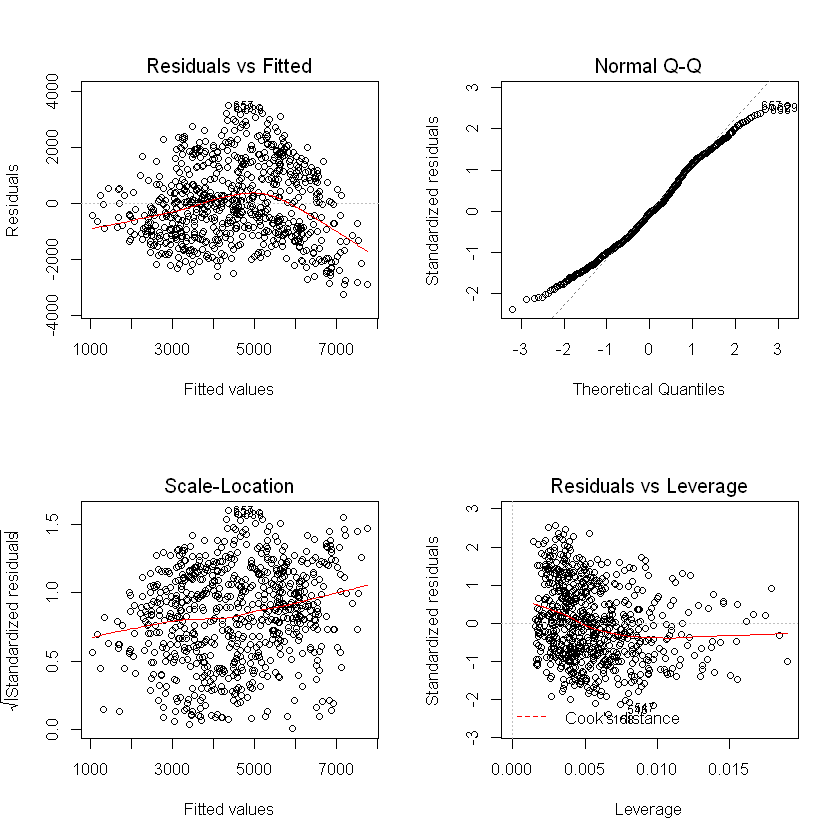

In [44]:
model <- lm(normalized$cnt~normalized$hum + normalized$windspeed + normalized$atemp)
summary(model)
par(mfrow=c(2, 2))
plot(model)